<a href="https://colab.research.google.com/github/anutishah/project_chd/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [258]:
! git clone https://github.com/DS3001/project_chd


fatal: destination path 'project_chd' already exists and is not an empty directory.


In [259]:
import pandas as pd
import numpy as np
import seaborn as sns

In [260]:
df_train = pd.read_csv('/content/project_chd/fhs_train.csv')
df_test = pd.read_csv('/content/project_chd/fhs_test.csv')
print(df_train.head())
print(df_test.head())

   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1267    1   58        1.0              0         0.0     0.0   
1        1209    0   40        1.0              1        15.0     0.0   
2        2050    0   52        1.0              0         0.0     0.0   
3        1183    1   38        2.0              1        43.0     0.0   
4        3225    0   43        1.0              0         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    220.0  143.0  104.0  29.85   
1                0             0         0    199.0  122.0   82.0  22.16   
2                0             0         0    275.0  112.0   71.0  25.68   
3                0             1         0    170.0  130.0   94.0  23.90   
4                0             0         0    202.0  124.0   92.0  21.26   

   heartRate  glucose  TenYearCHD  
0         75     87.0           1  
1         85     77.0           

In [261]:
print(df_train.shape)
print(df_test.shape)

(3180, 17)
(1060, 17)


In [262]:
print(df_train.dtypes)
print(df_test.dtypes)

Unnamed: 0           int64
sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose            float64
TenYearCHD           int64
dtype: object
Unnamed: 0           int64
sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [263]:
hr = df_train['heartRate']
hr.unique()

array([ 75,  85,  80, 110,  91,  63,  70,  44, 103,  58,  74,  95,  78,
        60,  81,  68,  79, 100,  72,  93,  66,  77,  69,  76,  65,  67,
        54,  62,  90,  73, 120, 106, 115,  50,  64,  82,  98,  57,  83,
        88,  84,  86,  92,  56,  96,  94,  87, 108,  55,  71,  52, 102,
       107,  51,  61,  53,  89, 105,  59, 140, 104,  99, 125, 112, 122,
        48,  46,  97,  47, 130])

In [264]:
hr = df_test['heartRate']
hr.unique()

array([ 78.,  60.,  80.,  85.,  58.,  70.,  67.,  72.,  75.,  92.,  68.,
        73.,  82.,  84.,  88.,  63.,  79.,  83.,  90.,  62.,  65.,  52.,
        81.,  56.,  87.,  64.,  96.,  76.,  95., 102.,  71., 108.,  94.,
        74.,  66.,  77.,  86.,  69., 100.,  nan,  55.,  57.,  50.,  45.,
       110., 103., 125.,  98., 105.,  91., 143.,  89., 101., 112., 107.,
        48., 104., 122.,  59.,  61., 120.])

In [265]:
chol_train = df_train['totChol']
chol_train.unique()

array([220., 199., 275., 170., 202., 232., 237., 254., 332., 259., 229.,
       315., 257., 214., 261., 210., 309., 247., 193., 285., 179., 184.,
       207., 256., 180., 301., 240., 152., 219., 290., 311., 148., 276.,
       160., 194., 252., 230., 201., 322., 238., 288., 246., 267., 283.,
       228., 186., 159., 277., 342., 292., 213., 270., 185., 175., 233.,
       336., 171., 221., 218., 225., 263., 216., 200., 187., 340., 273.,
       241., 296., 212., 196., 192., 354., 260., 189., 258., 250., 334.,
       183., 265., 209., 195., 243., 222., 271., 289., 347., 321., 150.,
       299., 206., 167., 165., 302., 231., 266., 204., 223., 272., 198.,
       236., 235., 215., 156., 155., 300., 217., 280., 245., 262., 305.,
       306., 269., 203., 390., 325., 211., 242., 350., 314., 323., 234.,
       190., 287., 328., 268., 188., 304., 205., 294., 174., 297., 293.,
       278.,  nan, 227., 172., 329., 249., 244., 178., 154., 248., 239.,
       251., 286., 226., 346., 153., 312., 282., 25

In [266]:
chol_NA = chol_train.isnull()
print(np.sum(chol_NA),'\n') #only 39 nan values out of ~3000
chol_train = chol_train.dropna()

39 



In [267]:
chol_train.unique()

array([220., 199., 275., 170., 202., 232., 237., 254., 332., 259., 229.,
       315., 257., 214., 261., 210., 309., 247., 193., 285., 179., 184.,
       207., 256., 180., 301., 240., 152., 219., 290., 311., 148., 276.,
       160., 194., 252., 230., 201., 322., 238., 288., 246., 267., 283.,
       228., 186., 159., 277., 342., 292., 213., 270., 185., 175., 233.,
       336., 171., 221., 218., 225., 263., 216., 200., 187., 340., 273.,
       241., 296., 212., 196., 192., 354., 260., 189., 258., 250., 334.,
       183., 265., 209., 195., 243., 222., 271., 289., 347., 321., 150.,
       299., 206., 167., 165., 302., 231., 266., 204., 223., 272., 198.,
       236., 235., 215., 156., 155., 300., 217., 280., 245., 262., 305.,
       306., 269., 203., 390., 325., 211., 242., 350., 314., 323., 234.,
       190., 287., 328., 268., 188., 304., 205., 294., 174., 297., 293.,
       278., 227., 172., 329., 249., 244., 178., 154., 248., 239., 251.,
       286., 226., 346., 153., 312., 282., 253., 31

In [268]:
chol_test = df_test['totChol']
chol_test.unique()

array([ nan, 264., 271., 207., 202., 218., 236., 214., 232., 282., 203.,
       267., 318., 307., 366., 156., 174., 173., 254., 328., 215., 281.,
       175., 280., 261., 225., 189., 272., 265., 310., 250., 216., 212.,
       190., 163., 288., 220., 226., 205., 241., 210., 277., 262., 245.,
       237., 340., 149., 223., 290., 259., 240., 253., 198., 274., 339.,
       287., 233., 162., 284., 180., 248., 270., 201., 178., 169., 182.,
       285., 206., 273., 193., 311., 152., 222., 165., 230., 234., 260.,
       224., 148., 239., 256., 286., 243., 247., 177., 257., 235., 185.,
       305., 300., 258., 283., 275., 263., 167., 196., 171., 331., 238.,
       217., 255., 246., 295., 345., 219., 186., 197., 227., 334., 199.,
       191., 293., 268., 252., 195., 303., 172., 278., 231., 304., 179.,
       276., 299., 213., 453., 308., 194., 296., 292., 176., 187., 209.,
       355., 229., 368., 316., 228., 211., 294., 168., 135., 200., 244.,
       183., 269., 333., 317., 289., 204., 170., 22

In [269]:
chol_NA = chol_test.isnull()
print(np.sum(chol_NA),'\n') #only 39 nan values out of ~3000
chol_test = chol_test.dropna()

11 



In [270]:
chol_test.unique()

array([264., 271., 207., 202., 218., 236., 214., 232., 282., 203., 267.,
       318., 307., 366., 156., 174., 173., 254., 328., 215., 281., 175.,
       280., 261., 225., 189., 272., 265., 310., 250., 216., 212., 190.,
       163., 288., 220., 226., 205., 241., 210., 277., 262., 245., 237.,
       340., 149., 223., 290., 259., 240., 253., 198., 274., 339., 287.,
       233., 162., 284., 180., 248., 270., 201., 178., 169., 182., 285.,
       206., 273., 193., 311., 152., 222., 165., 230., 234., 260., 224.,
       148., 239., 256., 286., 243., 247., 177., 257., 235., 185., 305.,
       300., 258., 283., 275., 263., 167., 196., 171., 331., 238., 217.,
       255., 246., 295., 345., 219., 186., 197., 227., 334., 199., 191.,
       293., 268., 252., 195., 303., 172., 278., 231., 304., 179., 276.,
       299., 213., 453., 308., 194., 296., 292., 176., 187., 209., 355.,
       229., 368., 316., 228., 211., 294., 168., 135., 200., 244., 183.,
       269., 333., 317., 289., 204., 170., 221., 26

In [271]:
chd = df_train['TenYearCHD']
chd.unique()

array([1, 0])

In [272]:
chd = df_test['TenYearCHD']
chd.unique()

array([0, 1])

In [273]:
chol_train = chol_train.astype(int)
chol_test = chol_test.astype(int)

In [274]:
# df_train.describe()

In [275]:
columns_to_drop = ['sex', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'sysBP',	'diaBP',	'BMI',	'glucose'	 ]
df_train = df_train.drop(columns=columns_to_drop)

In [276]:
# df_train.describe()

In [277]:
# df_test.describe()

In [278]:
columns_to_drop = ['sex', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'sysBP',	'diaBP',	'BMI',	'glucose'	 ]
df_test = df_test.drop(columns=columns_to_drop)

In [279]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [280]:
# df_test.describe()

In [281]:
combined_df = pd.concat([df_train, df_test], ignore_index=True)
print(combined_df.head())

   Unnamed: 0  age  totChol  heartRate  TenYearCHD
0        1267   58    220.0       75.0           1
1        1209   40    199.0       85.0           0
2        2050   52    275.0       80.0           0
3        1183   38    170.0      110.0           0
4        3225   43    202.0       75.0           0


In [282]:
combined_df.loc[:, ['totChol', 'TenYearCHD']].groupby('TenYearCHD').describe()

totChol                                                           
             count        mean        std    min     25%    50%    75%    max
TenYearCHD                                                                   
0           3555.0  235.147398  43.765750  113.0  205.00  232.0  261.0  696.0
1            634.0  245.430599  48.102206  107.0  213.25  241.0  272.0  600.0

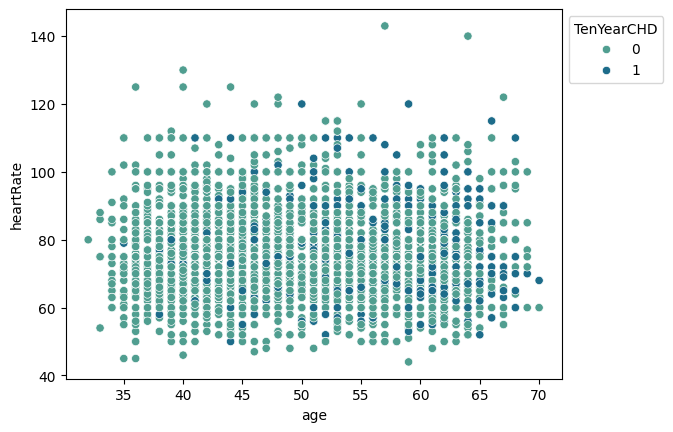

In [283]:
this_plot = sns.scatterplot(data=combined_df,x='age',y='heartRate',
                            hue='TenYearCHD',
                           palette = 'crest')
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

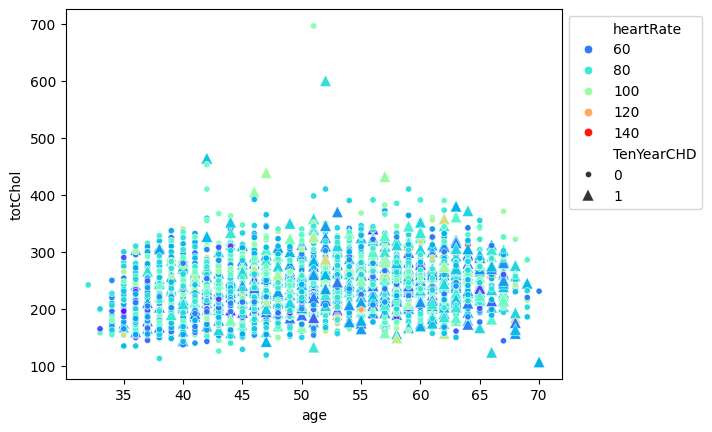

In [284]:
this_plot = sns.scatterplot(data=combined_df,
                            x='age',
                            y='totChol',
                            hue = 'heartRate',
                            style = 'TenYearCHD',
                            palette = 'rainbow' ,
                            size = 'TenYearCHD',
                            sizes = (70, 20),
                            markers = ['o', '^'])
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

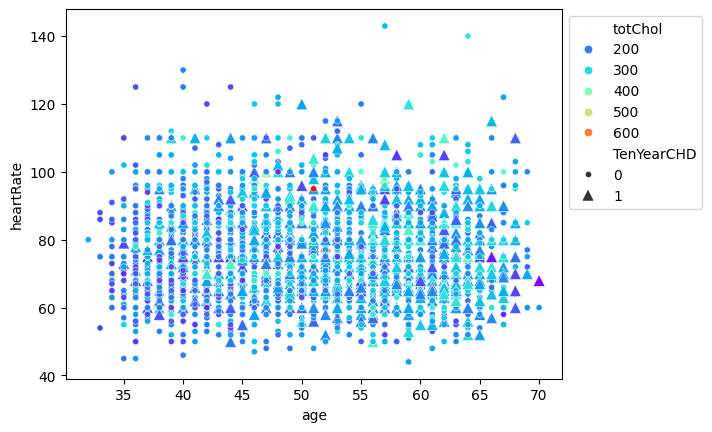

In [285]:
this_plot = sns.scatterplot(data=combined_df,
                            x='age',
                            y='heartRate',
                            hue = 'totChol',
                            style = 'TenYearCHD',
                            palette = 'rainbow' ,
                            size = 'TenYearCHD',
                            sizes = (70, 20),
                            markers = ['o', '^'])
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

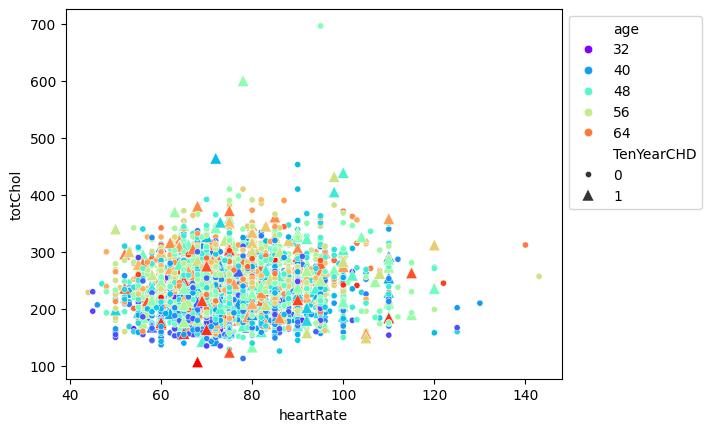

In [286]:
this_plot = sns.scatterplot(data=combined_df,
                            x='heartRate',
                            y='totChol',
                            hue = 'age',
                            style = 'TenYearCHD',
                            palette = 'rainbow' ,
                            size = 'TenYearCHD',
                            sizes = (70, 20),
                            markers = ['o', '^'])
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

In [287]:
y = combined_df['TenYearCHD']
X = combined_df.loc[:,['heartRate', 'totChol']]
print(X.head())
print(X.describe())

   heartRate  totChol
0       75.0    220.0
1       85.0    199.0
2       80.0    275.0
3      110.0    170.0
4       75.0    202.0
         heartRate      totChol
count  4189.000000  4189.000000
mean     75.850561   236.703748
std      12.037593    44.595768
min      44.000000   107.000000
25%      68.000000   206.000000
50%      75.000000   234.000000
75%      83.000000   263.000000
max     143.000000   696.000000


In [288]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

df_train['totChol'] = maxmin(df_train['totChol'])
df_train['heartRate'] = maxmin(df_train['heartRate'])
df_test['totChol'] = maxmin(df_test['totChol'])
df_test['heartRate'] = maxmin(df_test['heartRate'])

In [310]:
# k=21
# model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X_train, y_train)

In [315]:
# fitted_model = df_train
N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot

grid_x = np.linspace(0,1,N_x) # Create a grid of x values
grid_y = np.linspace(0,1,N_y) # Create a grid of y values

xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
X = xs.reshape(total) # Turns pairs into vectors
Y = ys.reshape(total) # Turns pairs into vectors

x_hat = pd.DataFrame({'heartRate':X,'totChol':Y}) # Create a dataframe of points to plot
print(x_hat)
y_hat = model.predict(X_train) # Fit the model to the points
print(y_hat)
x_hat['Predicted CHD'] = y_hat # Add new variable to the dataframe
# Create seaborn plot:
print(x_hat['Predicted CHD'].describe())

this_plot = sns.scatterplot(data=x_hat,x='heartRate',y='totChol',
                            hue='Predicted CHD', palette = 'crest', linewidth=0)
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

      heartRate  totChol
0      0.000000      0.0
1      0.010101      0.0
2      0.020202      0.0
3      0.030303      0.0
4      0.040404      0.0
...         ...      ...
9995   0.959596      1.0
9996   0.969697      1.0
9997   0.979798      1.0
9998   0.989899      1.0
9999   1.000000      1.0

[10000 rows x 2 columns]
[0.14       0.15       0.15333333 ... 0.11666667 0.17333333 0.18666667]


ValueError: Length of values (3141) does not match length of index (10000)

In [291]:
# df_test.head()

In [292]:
# print(df_train['totChol'].unique())


In [293]:
# print(df_test['totChol'].unique())

In [294]:
from sklearn.model_selection import train_test_split
y_train = df_train['TenYearCHD']
X_train = df_train.drop('TenYearCHD',axis=1)

In [295]:
from sklearn.model_selection import train_test_split
y_test = df_test['TenYearCHD']
X_test = df_test.drop('TenYearCHD',axis=1)

In [296]:
# X_train['heartRate'].unique()

In [297]:
# X_train['totChol'].unique()

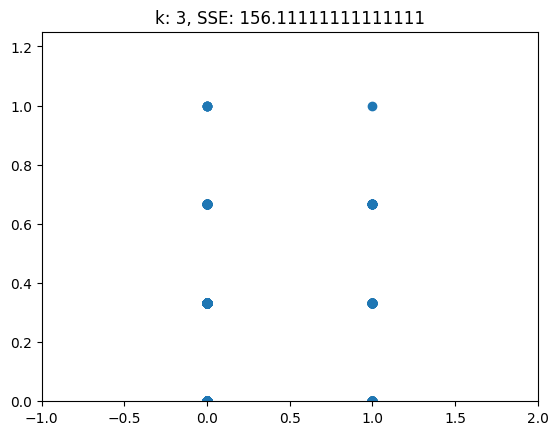

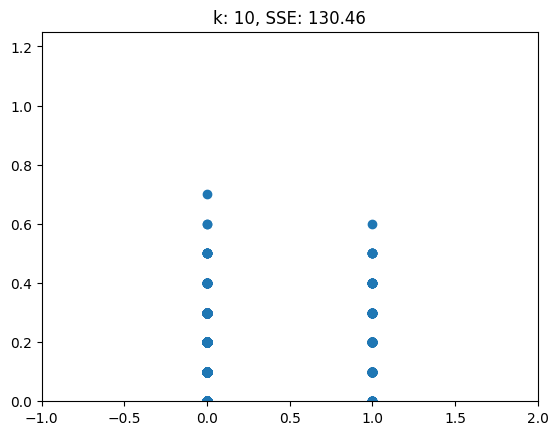

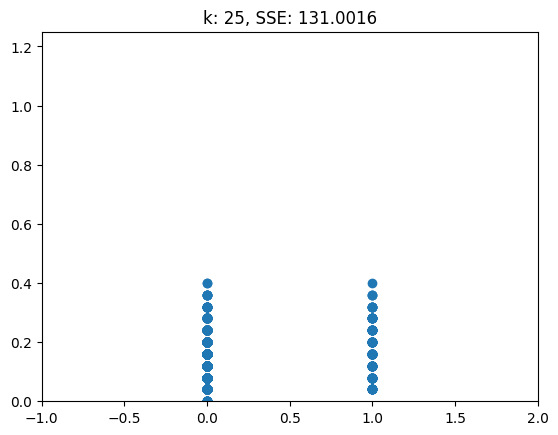

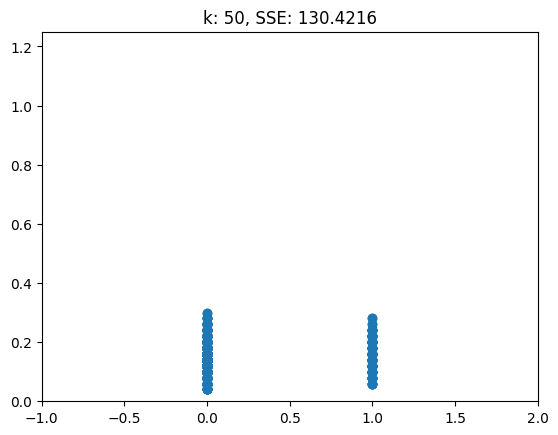

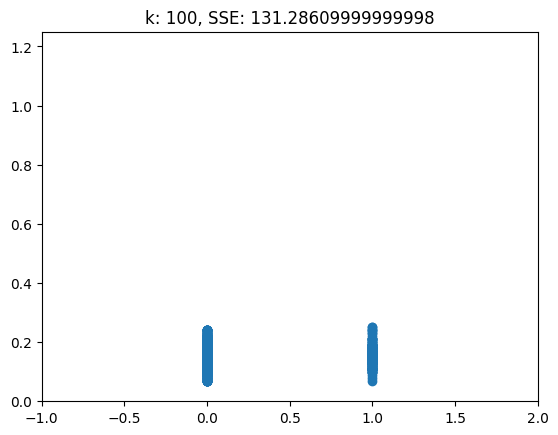

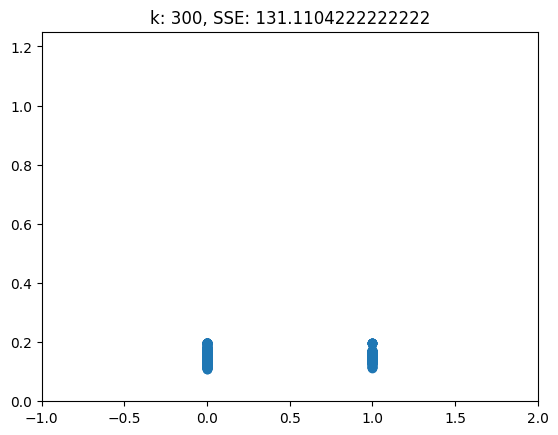

In [298]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

for k in [3,10,25,50,100,300]:

    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)

    SSE = np.sum( (y_test-y_hat)**2 )
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(0,1.25)
    axes.set_xlim(-1, 2)
    plt.show()

In [299]:
combined_df = pd.concat([df_train, df_test], ignore_index=True)
combined_df.head()

,Unnamed: 0,age,totChol,heartRate,TenYearCHD
0,1267,58,0.191851,0.322917,1
1,1209,40,0.156197,0.427083,0
2,2050,52,0.285229,0.375000,0
3,1183,38,0.106961,0.687500,0
4,3225,43,0.161290,0.322917,0


In [300]:
combined_df.describe()

,Unnamed: 0,age,totChol,heartRate,TenYearCHD
count,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000
mean,2121.695870,49.554070,0.250924,0.327539,0.151349
std,1224.991273,8.560881,0.107929,0.125042,0.358431
min,1.000000,32.000000,0.000000,0.000000,0.000000
25%,1061.000000,42.000000,0.178268,0.239583,0.000000
50%,2123.000000,49.000000,0.231003,0.322917,0.000000
75%,3184.000000,56.000000,0.300912,0.395833,0.000000
max,4240.000000,70.000000,1.000000,1.000000,1.000000


<Axes: xlabel='TenYearCHD', ylabel='Density'>

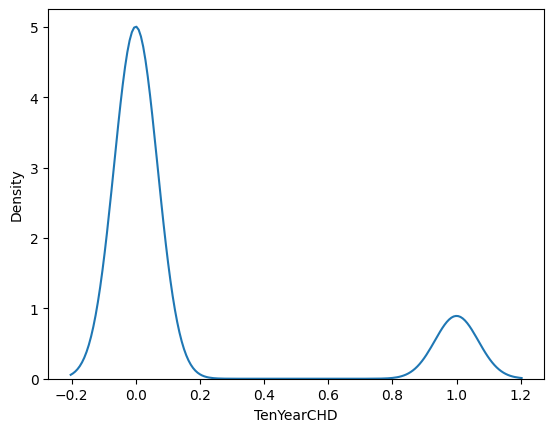

In [301]:
sns.kdeplot(data=combined_df,x='TenYearCHD')

In [302]:

# combined_df['HasCHD'] = combined_df['TenYearCHD'].replace([1])
# df['class'] = df['class'].replace(['MIDSIZE CARS','COMPACT CARS','SUBCOMPACT CARS','TWO SEATERS','LARGE CARS'],'car')
# df['class'] = df['class'].replace(['SMALL STATION WAGONS','MIDSIZE STATION WAGONS'],'station wagon')
# df['class'] = df['class'].replace(['STANDARD PICKUP TRUCKS','SMALL PICKUP TRUCKS'],'truck')
# df['class'] = df['class'].replace(['VANS','MINIVAN'],'van')
# combined_df.loc[:, ['heartRate', 'TenYearCHD']].groupby('TenYearCHD').describe()



[21]


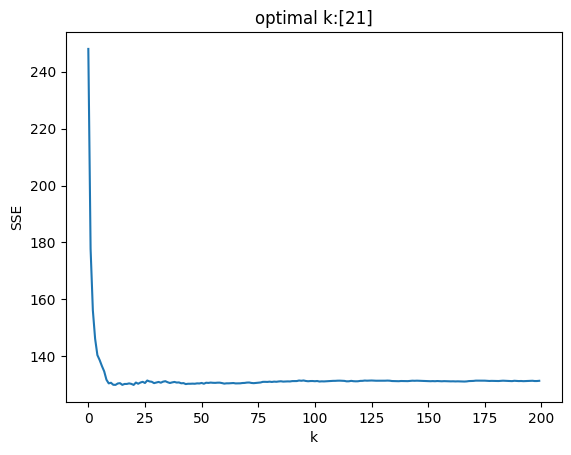

In [303]:
# Determine the optimal k:
k_bar = 200
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()

In [304]:
combined_df.loc[:, ['totChol', 'TenYearCHD']].groupby('TenYearCHD').describe()

totChol                                                    \
             count      mean       std       min       25%       50%   
TenYearCHD                                                             
0           3555.0  0.248295  0.107485  0.010187  0.174873  0.229202   
1            634.0  0.265665  0.109308  0.000000  0.190153  0.250424   

                                
                 75%       max  
TenYearCHD                      
0           0.297114  1.000000  
1           0.317143  0.837012

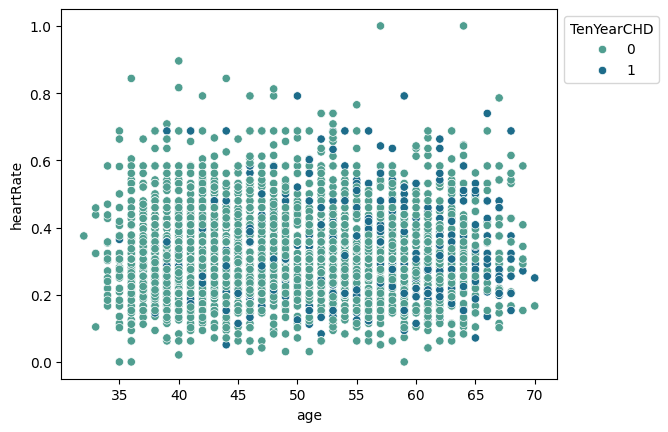

In [305]:

this_plot = sns.scatterplot(data=combined_df,x='age',y='heartRate',
                            hue='TenYearCHD',
                           palette = 'crest')
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

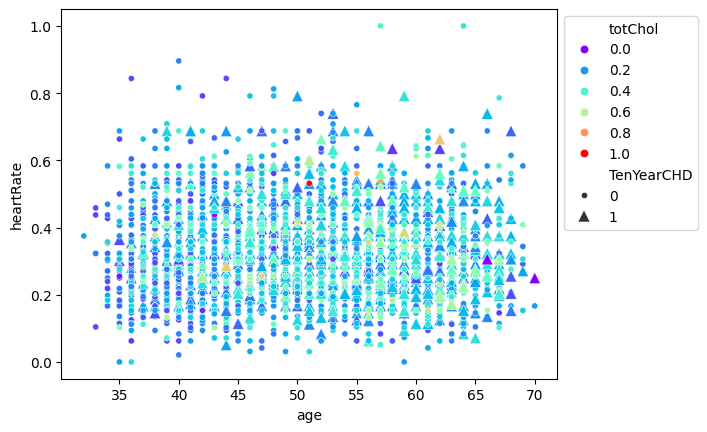

In [306]:
this_plot = sns.scatterplot(data=combined_df,
                            x='age',
                            y='heartRate',
                            hue = 'totChol',
                            style = 'TenYearCHD',
                            palette = 'rainbow' ,
                            size = 'TenYearCHD',
                            sizes = (70, 20),
                            markers = ['o', '^'])
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

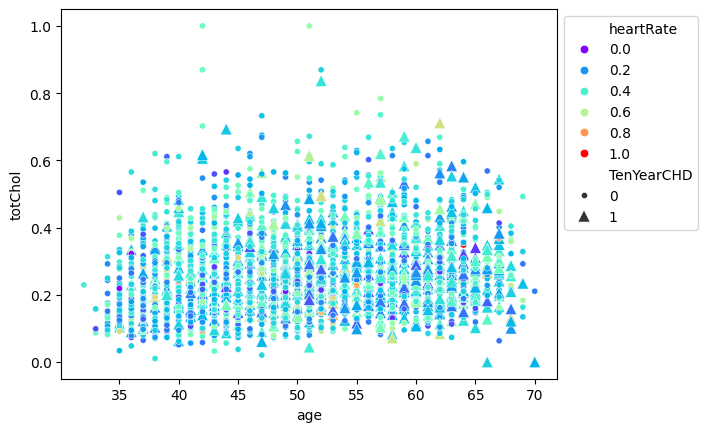

In [307]:
this_plot = sns.scatterplot(data=combined_df,
                            x='age',
                            y='totChol',
                            hue = 'heartRate',
                            style = 'TenYearCHD',
                            palette = 'rainbow' ,
                            size = 'TenYearCHD',
                            sizes = (70, 20),
                            markers = ['o', '^'])
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

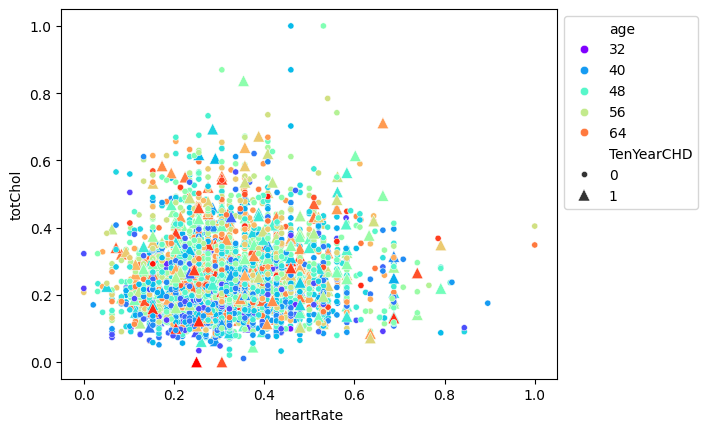

In [308]:
this_plot = sns.scatterplot(data=combined_df,
                            x='heartRate',
                            y='totChol',
                            hue = 'age',
                            style = 'TenYearCHD',
                            palette = 'rainbow' ,
                            size = 'TenYearCHD',
                            sizes = (70, 20),
                            markers = ['o', '^'])
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))